In [506]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [507]:
# trying to differentiate between human and computer generated random numbers (cant think of practical applications just for fun and to see if i can)
# first thought was to use LDA but the algorithm is too hard for to implement right now and im not sure if itd work 
# will try another method using probability of each position being a certain digit (like naive bayes)

In [508]:
#load raw data 
dat = pd.read_csv("Hello (Responses).csv")
numOfDatasets = len(dat)
dat = dat[["labels", "numbers"]]
dat

,labels,numbers
0,human,764630368926946241527490254892378
1,human,738372947472930184615492017492036
2,human,0294727402847104726349284729405829028
3,human,3738847382829293838393947373929293838383939383...
4,human,9292737378291918273728282827383039737338389393938
...,...,...
367,human,4376816737940083464670466497649499734915729475...
368,human,8282751541452638839506070088654322568938585689...
369,human,3443135578081826252728262728292927272537383390...
370,human,162626373838393525833902762526273839372529394615


In [509]:
# make a list of first 30 digits in each entry
datalist = list(dat["numbers"])
newList = []
for number in datalist:
    newList.append(number[:30])
newList

['764630368926946241527490254892',
 '738372947472930184615492017492',
 '029472740284710472634928472940',
 '373884738282929383839394737392',
 '929273737829191827372828282738',
 '918283929282726373637929193747',
 '958484736262627488493939487484',
 '958474737392038747493937376493',
 '827273840497474636382991826474',
 '262079472936202729739363964372',
 '811882282922929292922929229292',
 '385385385385273158961852843963',
 '040622043773104798307579842819',
 '464546678999973772929919177728',
 '991816161552517819200292761514',
 '627165263738484875838282716617',
 '627162646488364858588472626156',
 '383748283627468273737837472737',
 '281882737381819192727272718181',
 '362627272828282919192828289282',
 '499976184067735524377455993727',
 '316457946583721546897543824619',
 '637372827192928739192828291747',
 '383848495958265936493629473927',
 '838377327266284949605002917165',
 '749165926554294745295629573940',
 '102735153969141956191947152649',
 '193958573727594100191722747484',
 '203848472972650929

In [510]:
# make a new column for each digit in the entries (up to 30th digit) and add it as a column to dataframe 
for i in range(0, 30):
    # label each column for the position number of te digits it contains 
    dat[f"{i}"] = [num[i] for num in newList]
# drop the raw data column 
dat = dat.drop("numbers", axis=1)
dat = dat.sample(frac=1).reset_index(drop=True) # shuffle
# test data probably unnecessary for this method but will do a small one anyways }}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}
# testDat = dat[-12:] # take out some from te bottom for testing (will random since data has been shuffled)
# dat = dat.drop(dat[-12:].index)
HumanResponsesCount = len(dat) 
dat
# dont covert to int now. can convert when in the numpy arrays (easier to convert the whole thing when we dont have a column that we want to keep as string)

,labels,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,human,0,2,8,7,5,4,3,6,5,...,5,6,3,9,8,5,6,5,2,8
1,human,3,6,3,7,3,8,4,7,3,...,4,8,4,8,4,8,4,8,4,9
2,human,1,2,3,3,4,4,5,6,8,...,4,3,3,3,4,5,6,7,8,8
3,human,5,1,8,4,9,2,7,5,3,...,1,5,1,4,4,9,2,0,1,7
4,human,1,9,2,8,8,3,8,3,8,...,8,4,7,7,4,7,3,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,human,2,8,1,6,3,8,1,0,1,...,2,8,1,6,3,8,4,0,2,8
368,human,9,9,1,8,1,6,1,6,1,...,0,2,9,2,7,6,1,5,1,4
369,human,3,1,1,3,0,3,2,6,2,...,7,3,1,9,7,7,2,0,0,3
370,human,9,1,8,2,8,3,7,3,6,...,6,1,5,5,3,3,7,3,9,9


In [511]:
# add rows of computer generated data equal to the number of human data collected
CompResponsesCount = HumanResponsesCount # equal number
for i in range(0, CompResponsesCount):
    tempList = []
    tempList.append("computer")
    for x in range(0, 30):
        tempList.append(str(random.randint(0, 9)))
    dat.loc[len(dat.index)] = tempList

TrainingData = dat
for column in TrainingData.columns:
    if column != "labels":
        TrainingData[column] = TrainingData[column].astype(int)

TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 0 to 743
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  744 non-null    object
 1   0       744 non-null    int32 
 2   1       744 non-null    int32 
 3   2       744 non-null    int32 
 4   3       744 non-null    int32 
 5   4       744 non-null    int32 
 6   5       744 non-null    int32 
 7   6       744 non-null    int32 
 8   7       744 non-null    int32 
 9   8       744 non-null    int32 
 10  9       744 non-null    int32 
 11  10      744 non-null    int32 
 12  11      744 non-null    int32 
 13  12      744 non-null    int32 
 14  13      744 non-null    int32 
 15  14      744 non-null    int32 
 16  15      744 non-null    int32 
 17  16      744 non-null    int32 
 18  17      744 non-null    int32 
 19  18      744 non-null    int32 
 20  19      744 non-null    int32 
 21  20      744 non-null    int32 
 22  21      744 non-null    int32 


In [512]:
# add rows of computer generated data equal to the number of human data used for testing
y = TrainingData["labels"].replace({"human": 1,"computer": 0}, inplace=False)
x= TrainingData.iloc[:, 1:]
yTrain, yTest, xTrain, xTest = train_test_split(y, x, test_size=0.1)
yTrain

C:\Users\aryav\AppData\Local\Temp\ipykernel_5232\1233509829.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = TrainingData["labels"].replace({"human": 1,"computer": 0}, inplace=False)


369    1
313    1
674    0
647    0
67     1
      ..
558    0
345    1
471    0
520    0
693    0
Name: labels, Length: 669, dtype: int64

In [513]:
# test using naivebayes from sklearn to see how much the expected accuracy would be 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [514]:
clf = MultinomialNB()
clf.fit(X=xTrain ,y=yTrain)

MultinomialNB()

In [515]:
yPredicted = clf.predict(xTest)
print("accuracy:", accuracy_score(yTest, yPredicted))

accuracy: 0.6133333333333333


In [516]:
# used to test later 
def CheckAns(x):
    print("correct ans:", yTrain.iloc[x])
    return yTrain.iloc[x]
CheckAns(random.randint(0,numOfDatasets))

correct ans: 1


1

In [517]:
xTrain

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
369,3,1,1,3,0,3,2,6,2,7,...,7,3,1,9,7,7,2,0,0,3
313,9,6,3,8,7,2,8,7,2,5,...,1,4,2,5,3,4,3,2,2,9
674,5,4,1,2,2,7,9,3,8,7,...,5,7,1,7,8,9,9,2,1,5
647,5,9,4,4,3,9,7,7,2,8,...,3,1,6,5,0,2,3,1,3,7
67,3,5,7,8,9,7,3,8,9,7,...,5,2,8,7,5,3,9,7,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,9,0,5,8,9,5,6,7,3,0,...,9,7,8,1,5,6,3,0,9,8
345,1,6,3,7,4,8,2,9,1,0,...,1,6,3,7,4,8,5,9,9,1
471,0,0,1,2,7,2,0,8,0,8,...,7,9,8,3,1,0,4,9,1,5
520,9,4,8,1,3,4,6,0,7,2,...,1,6,7,8,4,5,9,7,3,9


In [518]:
yTrain.index 

Index([369, 313, 674, 647,  67, 229, 592, 347, 720, 439,
       ...
       161, 455, 450, 690, 616, 558, 345, 471, 520, 693],
      dtype='int64', length=669)

In [519]:
listOfHumans = []
for index in xTrain.index: 
    # print(index)
    if yTrain.loc[index] == 1:
        listOfHumans.append(index)
listOfHumans

[369,
 313,
 67,
 229,
 347,
 182,
 143,
 141,
 228,
 43,
 198,
 342,
 274,
 113,
 306,
 39,
 72,
 194,
 206,
 200,
 232,
 319,
 21,
 235,
 71,
 130,
 210,
 59,
 105,
 155,
 47,
 339,
 82,
 221,
 49,
 174,
 127,
 250,
 146,
 51,
 13,
 216,
 86,
 54,
 294,
 5,
 212,
 251,
 330,
 261,
 243,
 135,
 323,
 63,
 84,
 241,
 144,
 224,
 296,
 36,
 15,
 123,
 110,
 64,
 188,
 35,
 25,
 108,
 213,
 255,
 17,
 292,
 26,
 139,
 77,
 106,
 34,
 201,
 158,
 215,
 78,
 370,
 283,
 281,
 128,
 131,
 75,
 275,
 286,
 111,
 340,
 125,
 338,
 95,
 303,
 164,
 117,
 103,
 349,
 68,
 195,
 190,
 3,
 324,
 254,
 265,
 165,
 348,
 178,
 239,
 170,
 225,
 176,
 132,
 344,
 76,
 122,
 22,
 326,
 312,
 58,
 177,
 14,
 31,
 102,
 288,
 24,
 284,
 116,
 231,
 4,
 118,
 115,
 358,
 367,
 80,
 366,
 156,
 336,
 50,
 220,
 56,
 29,
 360,
 282,
 55,
 333,
 120,
 233,
 142,
 204,
 33,
 353,
 271,
 73,
 191,
 223,
 148,
 16,
 222,
 273,
 181,
 6,
 262,
 40,
 32,
 9,
 88,
 12,
 168,
 189,
 208,
 169,
 245,
 309,
 337,
 

In [520]:
listOfComps = []
for elm in xTrain.index:
    if elm not in listOfHumans:
        listOfComps.append(elm)

In [521]:
# count the probability of each digit appearing in each category
humanData = TrainingData.iloc[listOfHumans, 1:]
compData = TrainingData.iloc[listOfComps, 1:]
def dataToCountDict(data):
    # np.unique returns two lists of each unique occurence and second list of corresponding counts 
    digits, Counts = np.unique(data, return_counts=True) 
    Dictionary = dict(zip(digits, Counts))
    return Dictionary

humanDict = dataToCountDict(humanData)
compDict = dataToCountDict(compData)

totalCountH = len(humanData)*30 # will be the same for human and comp 
totalCountC = len(compData)*30 # but use both just in case we want to use this for a dataset with unequal number

def CountToProbDict(dictionary, totalCount):
    for i in range(0, len(dictionary)):
        dictionary[i] = dictionary[i] / totalCount
    return dictionary
humanProbs = CountToProbDict(humanDict, totalCountH)
compProbs = CountToProbDict(compDict, totalCountC)
humanProbs


{0: 0.043213572854291414,
 1: 0.07165668662674651,
 2: 0.13183632734530937,
 3: 0.12375249500998003,
 4: 0.09730538922155689,
 5: 0.07445109780439121,
 6: 0.09740518962075849,
 7: 0.12335329341317365,
 8: 0.12365269461077845,
 9: 0.11337325349301397}

Text(0, 0.5, 'probability')

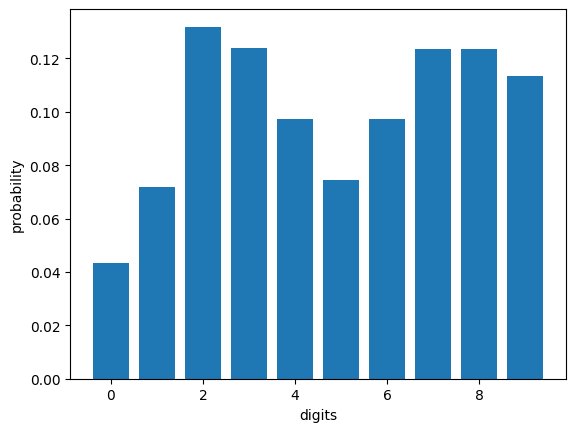

In [522]:
# visualise (not rlly necessary for this dataset i guess but wnat to try)
plt.bar(humanProbs.keys(), humanProbs.values())
plt.xlabel("digits")
plt.ylabel("probability")
# relative frequency of  each digit appearing in human spam
# expected bimodal since people use number keys at the top of the keybpard with two fingers on phone

Text(0, 0.5, 'probability')

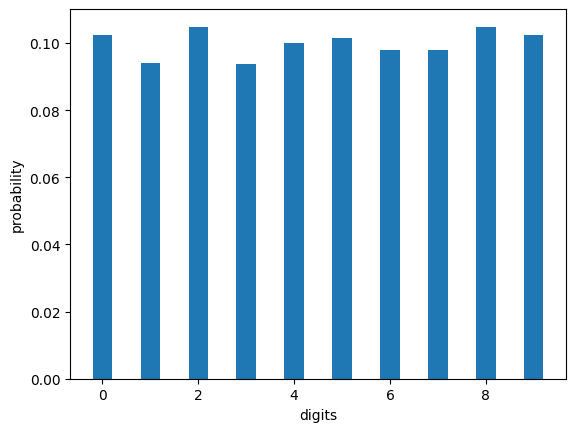

In [523]:
plt.bar(compProbs.keys(), compProbs.values(), width=0.4) # trying thinner bars
plt.xlabel("digits")
plt.ylabel("probability")
# obvious difference in distribution can prb be used to differentiate

In [524]:
# first thing to try is naive bayes 

# prior P(is Human) based on data given (will simply be 0.5 in this case but good to calculate in case we want to use this again for different dataset)
priorProbabilityHuman = dat["labels"].value_counts(normalize=True).iloc[0] # gives relative frequencey of each unique occurence (we only want human so take the first index only)
priorProbabilityComp = dat["labels"].value_counts(normalize=True).iloc[1]

def NaiveBayes(NParray): # will return "human" or "computer" with probabilty 
# prior(ie P(is human)) * P(0 occuring given human)**(number of times 0 apppears) * P(1 occuring given human)**(number of times 1 appears)...etc will be proportionate to P(is human given all these digits are occuring)
    human = priorProbabilityComp
    for i in NParray:
        human = human * humanProbs[NParray[i]] # looks for the digit at i and multiplies by the probability of that digit appearing given that datapoint is human
# do the same for comp 
    computer = priorProbabilityComp
    for i in NParray:
        computer = computer * compProbs[NParray[i]]
    # since there are only two possible values (human or computer) and their probabilities must add to 1 the proportionality constant must be 1/(human + computer)
    if computer >= human:
        return ["computer", computer/(computer + human)]
    else:
        return ["human", human/(computer + human)]

In [525]:
NaiveBayes(xTrain.T.iloc[:, 2].to_numpy())[0]


'human'

In [526]:
# test with data in the training data 
correct = 0
yPredTrain = []
for i, ans in enumerate(yTrain):
    prediction = NaiveBayes(xTrain.T.iloc[:, i].to_numpy())[0]
    if prediction == "computer":
        prediction = 0
    elif prediction == "human":
        prediction = 1
    
    if prediction == ans:
        correct += 1
    yPredTrain.append(prediction)


accuracy = correct/len(yTrain.index)
print(accuracy) # not bad compared to sklearn but this is on training data 
yPredTrain = np.array(yPredTrain)

accuracy_score(yTrain, yPredTrain) # use accuracy_score to check if my calculations are correct 

0.6696562032884903


0.6696562032884903

In [527]:
(yTrain == yPredTrain).sum()

448

In [528]:
# test with data not in the training data 
# testData = pd.DataFrame(testDat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

correct = 0
yPredTest = []
for i, ans in enumerate(yTest):

    prediction = NaiveBayes(xTest.T.iloc[:, i].to_numpy())[0]
    if prediction == "computer":
        prediction = 0
    elif prediction == "human":
        prediction = 1
    
    if prediction == ans:
        correct += 1

accuracy = correct/len(yTest.index)
print(accuracy) # not very good but thats because we arent considering the order in which the digits appear (example given below)
# expected lower than sklearn multinomial NB but its consistently about the same/higher 

0.6533333333333333


In [529]:
# example of why naive bayes doesnt work that well 
NaiveBayes(np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])) # almost impossible for computer (P = 10**-30) to generate this but since very low probability of "1" occurring in human dataset it thinks this is definitely computer
# need to have consideration for the order of occurence as well since there are certain patterns humans follow 
#gaussian bayes will be implemented soon :)

['computer', 0.9997025633296406]